# Сборный проект 1. Выявление определяющих успешность игры закономерностей.

**Описание проекта**

Цель проекта: спланировать рекламные кампании, сделав ставку на потенциально популярный продукт.

Задача проекта: выявить определяющие успешность игры закономерности.

Мы имеем данные до 2016 года, необходимо спланироватькампанию на 2017 год. 



**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год релиза

Genre — жанр игры

NA_players — продажи игрокам в Северной Америке (в миллионах долларов)

EU_players — продажи игрокам в Европе (в миллионах долларов)

RU_players — продажи игрокам в России (в миллионах долларов)

Other_players — продажи игрокам в других странах

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг ESRB

ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**1. Загрузка файла с данными и изучение общей информации.**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy import stats as st
import copy

In [ ]:
df = pd.read_csv('.../datasets/games.csv')


In [ ]:
display(df.sample(20, random_state=1))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Над чем следует поработать:

-привести названия столбцов к нижнему регистру,

-Year_of_Release, привести к типу int,

-выяснить, что делать с tbd в User_Score,

-посчитать и при необходимости обработать пропуски.

**2. Подготовка данных**



Приведем названия столбцов к нижнему регистру:

In [ ]:
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на долю пропущенных значений в ДФ:

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.01
platform,0
year_of_release,1.61
genre,0.01
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.32
user_score,40.09


Как мы видим, в оценках и рейтинге доля пропусков 40% и 51%, это слишком много, их удаление приведет к искажению данных.

Приведем год выпуска к целочисленному виду, а пропуски заменим на любой год, не входящий в наш интервал, например, 2222: 

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(2222)

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Чем заполнять пропуски в оценках и рейтингах? Чтобы избежать путаницы с оценками, равыми нулю, заполним пропуски -1, и будем это учитывать в дальнейшем анализе.

In [ ]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

tbd - To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов для подсчета рейтинга пользователей и его публикации. По сути, мы имеем тот же пропуск. 


In [ ]:

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
df['rating'] = df['rating'].fillna('undefined')
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг маркируют буквами, соответствующими возрастам, поэтому мы видим тип object. Удалим 2 игры без имени и жанра.

In [ ]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


На этапе предобработки мы обнаружили настолько большое число пропусков в столбцах оценок и рейтинга, что их нельзя было удалять. Пропуски, по нашему предположению связаны с тем, что рейтинг и оценки не были проставлены:
 
-старым играм,
 
-производитель мог не заявить игру на рейтинг,
 
-некоторые пользователи не проставляют оценки,
 
-каждый день выходит столько игр, в том числе мелких, что пользователи и критики не способны знать обо всех,
 
-не во всех странах существуют или популярны платформы, где есть возможность поставить оценку игре.
 
 Было принято решение заполнить пропуски -1. Значения столбца года выпуска мы привели к целочисленному типу.


**3. Исследовательский анализ данных**

**Количество игр, выпущенных в разные годы.**

In [ ]:
df = df[df['year_of_release'] < 2222]

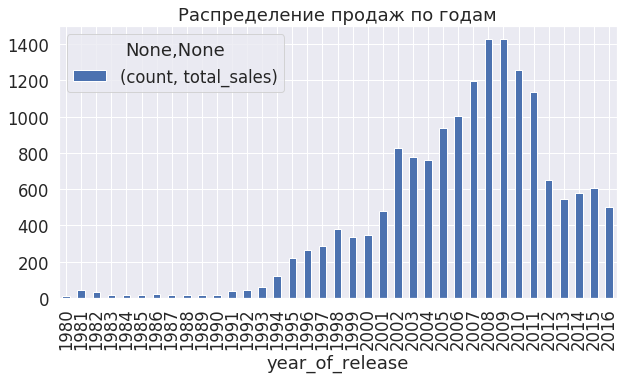

In [ ]:
pt_years = df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = ['count'])
pt_years.plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Распределение продаж по годам')
plt.show()

Игры начали продаваться с 1994 (около 100 млн копий), и до 2008 мы видим рост продаж, который незначительно снижался в 1999-2000 и 2003-2004 годах. После 2009 мы видим спад. Пик продаж приходится на 2008-2009, продано более 1,4 млд копий. Чтобы выявить определяющие успешность игры закономерности, важно иметь представления об истории продаж, ведь популярность игр связана не только с техническим прогрессом, но также с особенно "выстрелившими" маркетинговыми стратегиями или социально-экономическими событиями. Так, в 2002, когда мы видим резкий рост продаж, происходили ценовые войны производителей, стремящихся усилить свое проникновение на рынок, вышли «Warcraft III» и «Battlefield 1942». А снижение после 2008, например, связано с последствиями экономического кризиса или тем, что на разработку стало уходить больше времени. Все эти исторические факты полезно учитывать для любого прогнозирования.



**Изменение продаж по платформам.** 

In [ ]:
popular_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
popular_platform.sort_values(by='total_sales', ascending=False)
#Платформы с наибольшими суммарными продажами

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


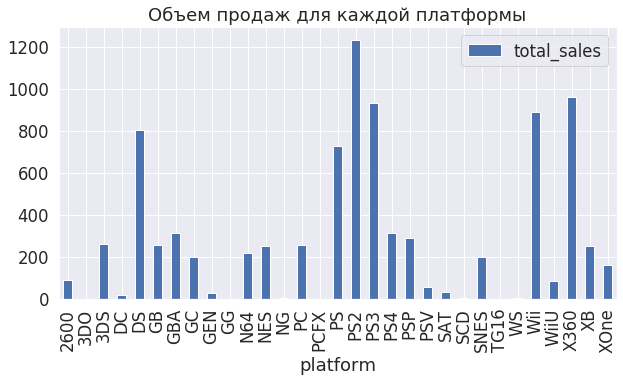

In [ ]:
popular_platform.plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Объем продаж для каждой платформы')
plt.show()

Лидеры продаж за весь рассматриваемый период - PS2, PS3, X360.

In [ ]:
platform_year = df.groupby(['platform', 'year_of_release'], as_index=False).aggregate({'total_sales': 'sum'})
platform_year.sort_values(by='total_sales', ascending=False).head(10)


,platform,year_of_release,total_sales
134,PS2,2004,211.81
200,Wii,2009,206.97
132,PS2,2002,205.38
133,PS2,2003,184.31
199,Wii,2008,171.32
218,X360,2010,170.03
124,PS,1998,169.49
131,PS2,2001,166.43
135,PS2,2005,160.66
147,PS3,2011,156.78


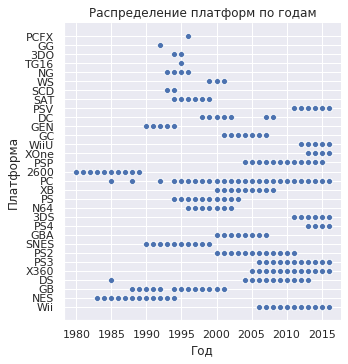

In [ ]:
sns.set()
sns.relplot(data = df, y = 'platform', x = 'year_of_release', label='small')           
plt.title('Распределение платформ по годам')
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.show()

Основной период существования платформы составляет 5-11 лет. Ислючение - РС, которая появилась в 1985, но стала активно продавать свои игры в 1994, и продает по сей день. Также мы можем видеть единичные платфомы, которые продавали игры 1-3 года.

Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Так как мы вычислили, что период существования платформы составляет 5-11 лет, то за актуальный период возьмем среднее значение - 8/2 лет (4 года взлет, 4 года падение), то есть с 2013 до конца 2016 года.

In [ ]:
relevant_period = df.query('year_of_release >= 2013')

**Платформы, лидирующие по продажам** 

In [ ]:
tops = relevant_period.groupby(['platform', 'year_of_release'], as_index=False).aggregate({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(10)
tops

,platform,year_of_release,total_sales
15,PS4,2015,118.90
9,PS3,2013,113.25
14,PS4,2014,100.00
32,X360,2013,88.58
16,PS4,2016,69.25
38,XOne,2015,60.14
0,3DS,2013,56.57
37,XOne,2014,54.07
10,PS3,2014,47.76
1,3DS,2014,43.76


Из сводной таблицы видно, как на рынок врываются PS4. Таким образом, лидеры продаж за актуальный период: PS4, PS3, X360, XOne, 3DS. Визуализируем результат, чтобы увидеть динамику и понять, кто растет, а кто падает. PC не показывают высоких продаж, но мы помним, что эта платформа самая живучая, поэтому включим ее в график.

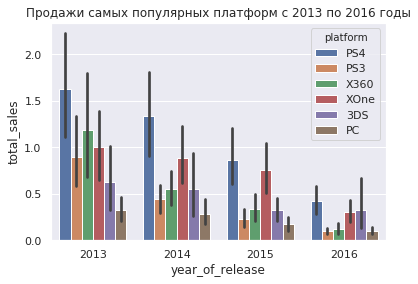

In [ ]:
top_platforms = ['PS4', 'PS3', 'X360', 'XOne','3DS', 'PC']

sns.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = relevant_period.query('platform in @top_platforms'),
            hue_order=top_platforms
           )
plt.title('Продажи cамых популярных платформ с 2013 по 2016 годы')
plt.show()


**Визуализация глобальных продаж игр в разбивке по платформам**. 

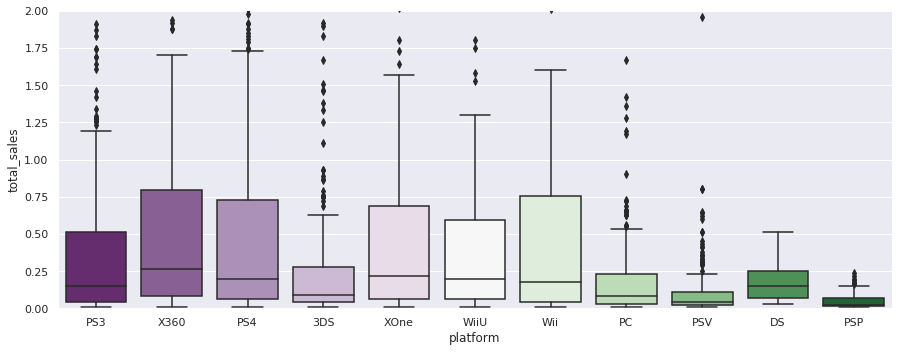

In [ ]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=relevant_period, 
            orient='v', 
            height=5, 
            aspect=2.5, 
            palette='PRGn')
_= plt.ylim(0, 2)

Лидерами продаж за актуальный период являются: X360, PS4, XOne, Wii. У 3DS, которые в топе продаж, большие выбросы, видимо, картину делает регион или некоторая группа людей (например, богатые фанаты)))

**Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы**.

In [ ]:
ps4_critic = relevant_period[(relevant_period['platform'] == 'PS4') & (relevant_period['critic_score'] != -1)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


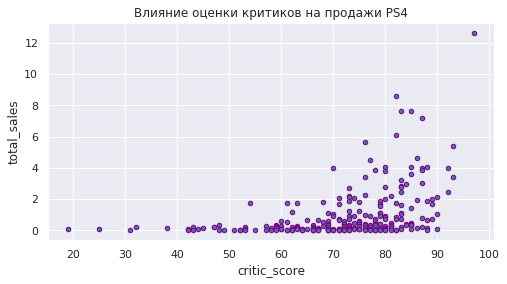

In [ ]:
ps4_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(8,4))
plt.title('Влияние оценки критиков на продажи PS4')
plt.show()

In [ ]:
ps4_user = relevant_period[(relevant_period['platform'] == 'PS4') & (relevant_period['user_score'] != -1)]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


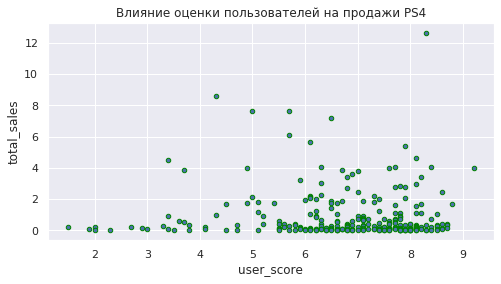

In [ ]:
ps4_user.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(8,4))
plt.title('Влияние оценки пользователей на продажи PS4')
plt.show()

In [ ]:
ps4 = relevant_period.query("platform == 'PS4'")
cor_parameters = ['critic_score', 'user_score', 'total_sales']
corr_ps4 = ps4[cor_parameters].corr()
corr_ps4.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1,0.557654,0.406568
user_score,0.557654,1,-0.0319571
total_sales,0.406568,-0.0319571,1


На диаграмме рассеяния 'Влияние оценки критиков на продажи PS4' и на матрице корреляции видно, что чем выше оценки критиков, тем выше продажи. При выборе платформы пользователи руководствуются мнением критиков, а не оценками пользователей.

**Соотнесение выводов с продажами игр на других платформах.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


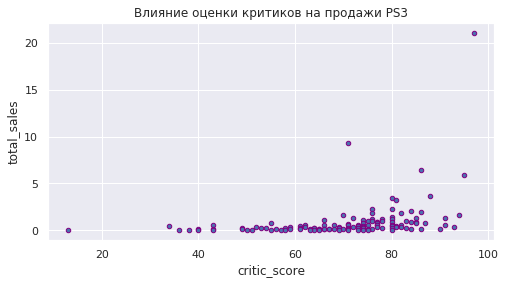

In [ ]:
ps3_critic = relevant_period[(relevant_period['platform'] == 'PS3') & (relevant_period['critic_score'] != -1)]
ps3_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(8,4))
plt.title('Влияние оценки критиков на продажи PS3')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


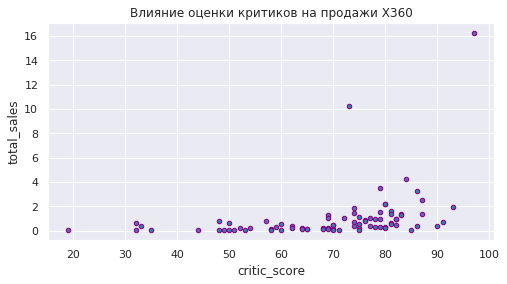

In [ ]:
X360_critic = relevant_period[(relevant_period['platform'] == 'X360') & (relevant_period['critic_score'] != -1)]
X360_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(8,4))
plt.title('Влияние оценки критиков на продажи X360')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


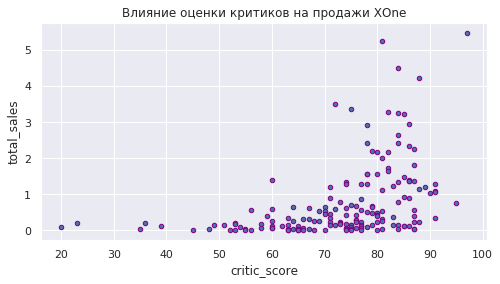

In [ ]:
XOne_critic = relevant_period[(relevant_period['platform'] == 'XOne') & (relevant_period['critic_score'] != -1)]
XOne_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(8,4))
plt.title('Влияние оценки критиков на продажи XOne')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


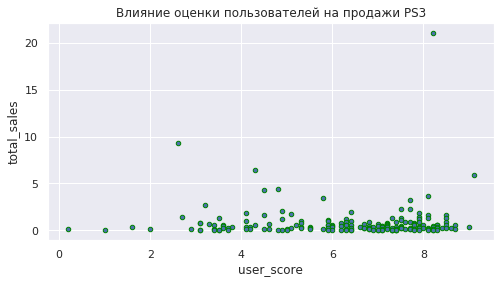

In [ ]:
ps3_user = relevant_period[(relevant_period['platform'] == 'PS3') & (relevant_period['user_score'] != -1)]
ps3_user.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(8,4))
plt.title('Влияние оценки пользователей на продажи PS3')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


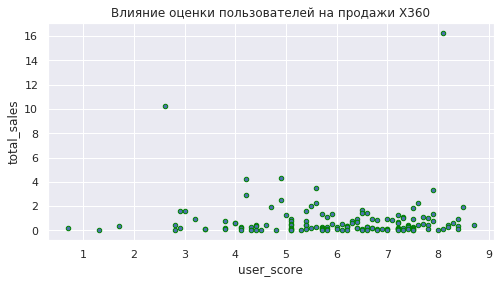

In [ ]:
X360_user = relevant_period[(relevant_period['platform'] == 'X360') & (relevant_period['user_score'] != -1)]
X360_user.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(8,4))
plt.title('Влияние оценки пользователей на продажи X360')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


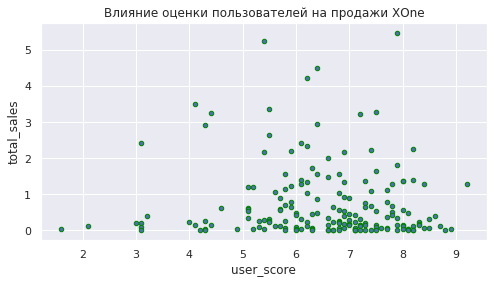

In [ ]:
XOne_user = relevant_period[(relevant_period['platform'] == 'XOne') & (relevant_period['user_score'] != -1)]
XOne_user.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(8,4))
plt.title('Влияние оценки пользователей на продажи XOne')
plt.show()

In [ ]:
ps3 = relevant_period.query("platform == 'PS3'")
corr_ps3 = ps3[cor_parameters].corr()
corr_ps3.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1,0.59992,0.334285
user_score,0.59992,1,0.0023944
total_sales,0.334285,0.0023944,1


In [ ]:
X360 = relevant_period.query("platform == 'X360'")
corr_X360 = X360[cor_parameters].corr()
corr_X360.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1,0.520946,0.350345
user_score,0.520946,1,-0.0117422
total_sales,0.350345,-0.0117422,1


In [ ]:
XOne = relevant_period.query("platform == 'XOne'")
corr_XOne = XOne[cor_parameters].corr()
corr_XOne.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total_sales
critic_score,1,0.472462,0.416998
user_score,0.472462,1,-0.0689251
total_sales,0.416998,-0.0689251,1


Анализ еще трех популярных платформ говорит о том, что оценки критиков могут повлиять на продажи, но не в большой степени. Уровень корреляции 0,3 - 0,4. Оценки пользователей не влияют на продажи.

In [ ]:
all_platforms = relevant_period.query('(user_score != -1) and (critic_score != -1)')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


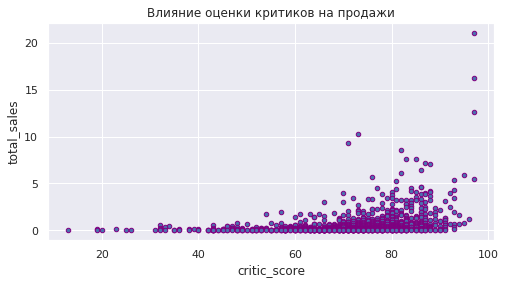

In [ ]:
all_platforms.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(8,4))
plt.title('Влияние оценки критиков на продажи')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


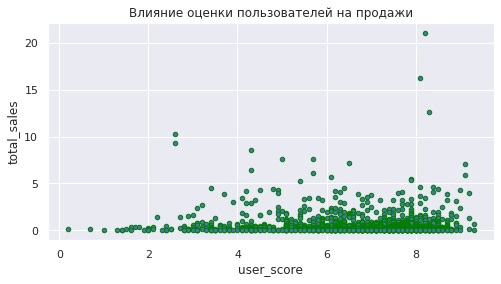

In [ ]:
all_platforms.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(8,4))
plt.title('Влияние оценки пользователей на продажи')
plt.show()

In [ ]:
all_platforms.pivot_table(index=['name'], values=['critic_score', 'user_score', 'total_sales']).corr().loc[:,'total_sales']
                                                                   
                                                                   
                                           

critic_score    0.360113
total_sales     1.000000
user_score      0.047912
Name: total_sales, dtype: float64

Даже без привязки к платформе мы получаем тот же результат.

**Распределение игр по жанрам**. 

In [ ]:
relevant_genres = relevant_period.groupby(['genre'], as_index=False).aggregate({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
relevant_genres

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


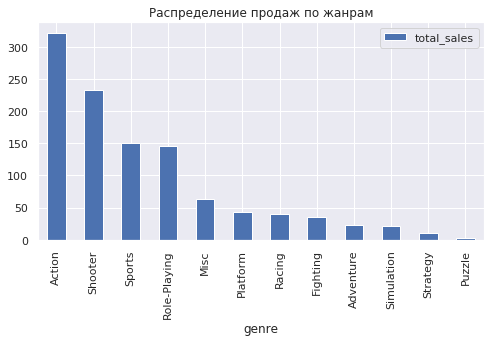

In [ ]:
relevant_genres.plot(x='genre', y='total_sales', kind='bar', grid=True, figsize=(8, 4))
plt.title('Распределение продаж по жанрам')
plt.show()

,mean,count
,total_sales,total_sales
genre,,
Action,0.420196,766
Adventure,0.096490,245
Fighting,0.441375,80
Misc,0.405290,155
Platform,0.576081,74
Puzzle,0.186471,17
Racing,0.469294,85
Role-Playing,0.499623,292


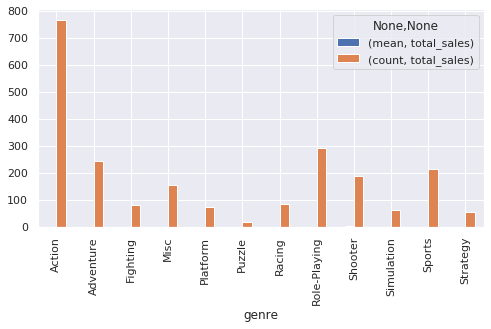

In [ ]:
relevant_genres_count = relevant_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['mean', 'count'])
relevant_genres_count.plot(kind='bar', grid=True, figsize=(8, 4))
relevant_genres_count

Первая тройка популярных жанров: Action, Shooter, Sports. Самый непродаваемый жанр: Puzzle. Но стоит учесть, что паззл в производстве самый легкий и дешевый. При этом игр в жанре Action производится в разы больше, чем всех остальных, значит, они берут количеством

Игры начали продаваться с 1994 (около 100 млн копий), и до 2008 мы видим рост продаж, который незначительно снижался в 1999-2000 и 2003-2004 годах. После 2009 мы видим спад. Пик продаж приходится на 2008-2009, продано более 1,4 млд копий. 
 
Лидеры продаж за весь период - PS2, PS3, X360. Лидерами продаж за актуальный период (2013 - 2016) являются: X360, PS4, XOne, Wii, 3DS, РС.

Основной период существования платформы составляет 5-11 лет. 
 
Оценки критиков в небольшой степени могут повлиять на продажи, оценки пользователей не оказывают влияния.

**4. Портрет пользователя каждого региона**




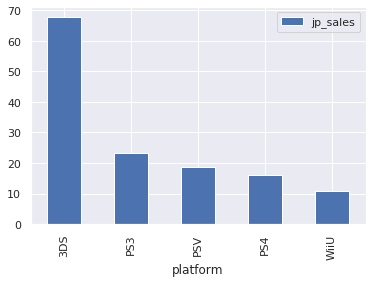

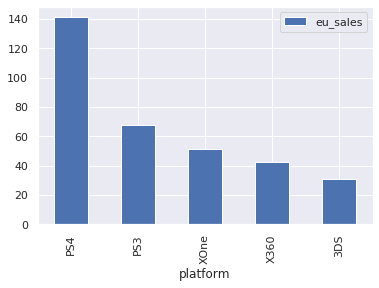

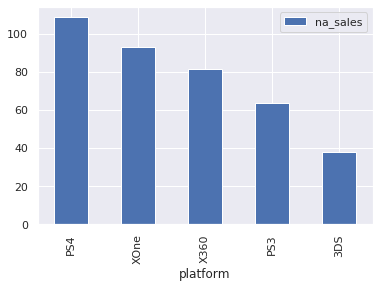

In [ ]:
relevant_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
relevant_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
relevant_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

Самые популярные платформы Японии: 3DS, PS3, PSV.

Самые популярные платформы ЕС: PS4, PS3, XOne.

Самые популярные платформы США: PS4, XOne, X360.

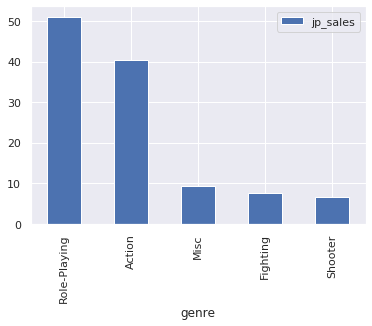

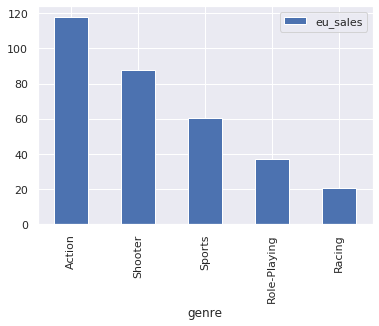

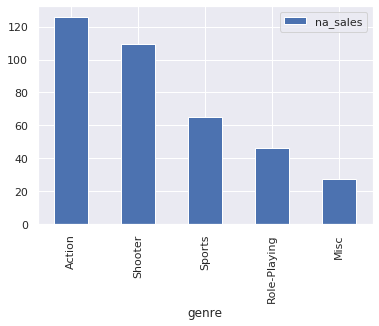

In [ ]:
relevant_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
relevant_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
relevant_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

В Японии больше всего покупают ролевые игры, в ЕС и США - экшены.

In [ ]:
rating_sales = relevant_period.pivot_table(index='rating', 
                                                                  values=['na_sales',
                                                                          'eu_sales',
                                                                         'jp_sales'], aggfunc='sum')
rating_sales = rating_sales_stat[['na_sales', 'eu_sales', 'jp_sales']]
rating_sales
 

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
undefined,89.42,78.91,85.05


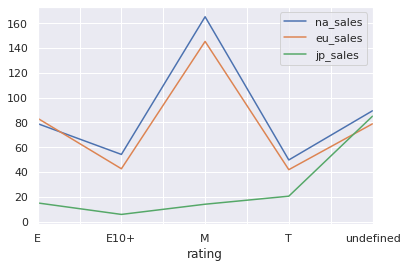

In [ ]:
rating_sales_stat.plot()
plt.show()

'E': 'Для всех', 

'M': 'Старше 17 лет', 

'T': '13-19 лет', 

'E10+': 'Старше 10 лет'. 


Да, рейтинг ESRB влияет на продажи по регионам. В Японии лучше всего продаются игры с неопределенным рейтингом, в США и ЕС - с рейтингом "Старше 17 лет".

Япония: Самые популярные платформы: 3DS, PS3, PSV, больше всего покупают ролевые игры и игры с рейтингом, по которому у нас нет данных.

ЕС: Самые популярные платформы: PS4, PS3, XOne,  больше всего покупают экшены и игры с рейтингом "Старше 17".

США: Самые популярные платформы: PS4, XOne, X360, больше всего покупают экшены и игры с рейтингом "Старше 17".



**5. Проверка гипотез**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.



**Гипотеза № 1:**

Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [ ]:
pc = relevant_period[(relevant_period['platform'] == 'PC') & (relevant_period['user_score'] > 0)]['user_score']
xone = relevant_period[(relevant_period['platform'] == 'XOne') & (relevant_period['user_score'] > 0)]['user_score']


In [ ]:
alpha = 0.05
results = st.ttest_ind(pc, xone, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [ ]:
print ('Средний пользовательский рейтинг платформы PC', pc.mean())
print ('Средний пользовательский рейтинг платформы Xbox One', xone.mean())

Средний пользовательский рейтинг платформы PC 6.2696774193548395
Средний пользовательский рейтинг платформы Xbox One 6.521428571428572


С вероятностью 86% мы можем утверждать, что  средние рейтинги для этих платформ не различаются. Таким образом, у нас нет оснований отвергать гипотезу Н0, делаем вывод, что оценки схожи, а различия статистически не значимы.

**Гипотеза № 2:**

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

Н1: Средние пользовательские рейтинги жанров Action и Sports разные.


In [ ]:
action = relevant_period[(relevant_period['genre'] == 'Action') & (relevant_period['user_score'] > 0)]['user_score']
sports = relevant_period[(relevant_period['genre'] == 'Sports') & (relevant_period['user_score'] > 0)]['user_score']

In [ ]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [ ]:
print ('Средний пользовательский рейтинг жанра Action', action.mean())
print ('Средний пользовательский рейтинг жанра Sports', sports.mean())

Средний пользовательский рейтинг жанра Action 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Вероятность случайного совпадения средних наших выборок ничтожно мала, поэтому мы отвергаем гипотезу о том, что средние пользовательские рейтинги игр жанров Action и Sports равны.

**6. Общий вывод**

Основной период существования платформы составляет 5-11 лет. 
 
Самыми успешными платформами с 2013 года оказываются: PS4, PS3, X360, XOne, 3DS. К 2016 продажи абсолютно всех платформ падают,а X360 и PS3 и вовсе стремится к нулю, так как их сменили обновленные модели - PS4 и XOne. У PS4 самое выигрышное положение, за ними идут 3DS и XOne.
 
Для прогнозирования стратегии на 2017 год мы могли бы рекомендовать:

-учитывать причины, которые привели к успеху Sony, 3DS, Xbox (например, упор на безопасность, возможность соревноваться с друзьями и т.д.);

-ориентироваться на реалии современного технического прогресса, например, на разработку мобильных игр и VR (предварительно провести анализ этих сегментов, так как все компьютерные платформы находятся в регрессии);

-учитывать, что оценки критиков  могут повлиять на продажи.  Оценки пользователей не влияют на продажи;

-учитывать разницу в продажах по регионам, а именно:

популярность жанров: Action, Shooter, Sports в ЕС и США, и ролевых игр в Японии,популярность игровых платформ:  3DS, PS3, PSV в Японии, PS4, PS3, XOne  - в ЕС и PS4, XOne, X360 в США. Также В Японии лучше всего продаются игры с неопределенным рейтингом, в США и ЕС - с рейтингом "Старше 17 лет".
